(2414, 48, 42)
training time = 9.0 sec
Matrix is correct! Error= 2.761852299404225e-08
Variance is correct! Error= 7.73262232187033e-12


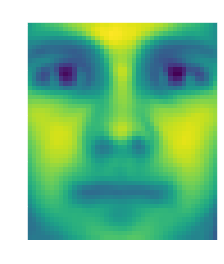

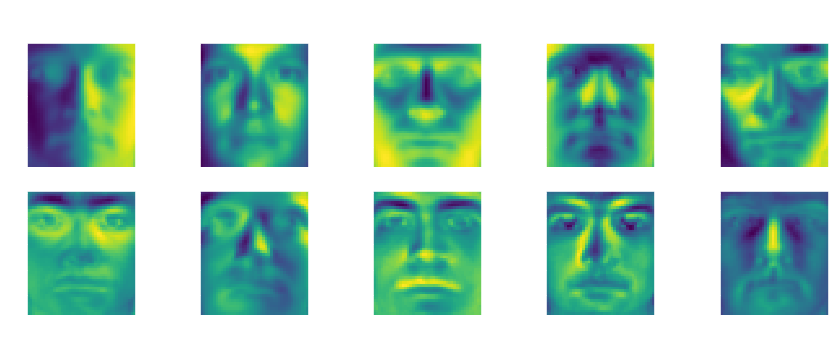

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
import time
%matplotlib inline

def validate_PCA(states, train_data):
    from sklearn.decomposition import PCA
    pca = PCA()
    pca.fit(train_data)
    true_matrix = pca.components_.T
    true_ev = pca.explained_variance_

    output_matrix = states['transform_matrix']
    error = np.mean(np.abs(np.abs(true_matrix) - np.abs(output_matrix)) / np.abs(true_matrix))
    if error > 0.01:
        print('Matrix is wrong! Error=',error)
    else:
        print('Matrix is correct! Error=', error)

    output_ev = states['eigen_vals']
    error = np.mean(np.abs(true_ev - output_ev) / true_ev)
    if error > 0.01:
        print('Variance is wrong! Error=', error)
    else:
        
        print('Variance is correct! Error=', error)

def train_PCA(train_data):
    ##### TODO: Implement here!! #####
    # Note: do NOT use sklearn here!
    # Hint: np.linalg.eig() might be useful
    states = {
      'transform_matrix': np.identity(train_data.shape[-1]),
      'eigen_vals': np.ones(train_data.shape[-1])
    }
    avg_face = np.mean(train_data,axis=0)
    plt.imshow(avg_face.reshape(48,42)); 
    plt.title('Average face')
    faces_matrix_centered = train_data-avg_face
    face_cov = np.cov(faces_matrix_centered.T)
    #face_cov = faces_matrix_centered.dot(faces_matrix_centered.T)
    eigen_vals, eigen_vecs = np.linalg.eig(face_cov)
    idx = eigen_vals.argsort()[::-1]   
    eigen_vals_sorted = eigen_vals[idx]
    eigen_vecs_sorted = eigen_vecs[:,idx]
    fig, axs = plt.subplots(2,5,figsize=(15,5))
    for i in np.arange(10):
        ax = plt.subplot(2,5,i+1)
        cur_img = eigen_vecs[:,i].reshape(48,42)
        #plt.imshow(cur_img, cmap='gray');
        plt.imshow(cur_img)
    fig.suptitle("First 10 eigenfaces", fontsize=16)
    states['transform_matrix'] = eigen_vecs_sorted
    states['eigen_vals'] = eigen_vals_sorted


    #matrix = sk_norm

    ##### TODO: Implement here!! #####
    return states

# Load data
start = time.time()
images = np.load('q2data/q2.npy')
print(images.shape)
num_data = images.shape[0]
train_data = images.reshape(num_data, -1)

states = train_PCA(train_data)
print('training time = %.1f sec'%(time.time() - start))

validate_PCA(states, train_data)


 Eigenvalues corresponding to the first 10 principal components are:
[2719333.89451627 2611865.95964518  365515.29797577  211149.83657024
  110603.22720593  104715.79567702   78512.9353901    67032.06261281
   52592.80467658   49197.08114141]


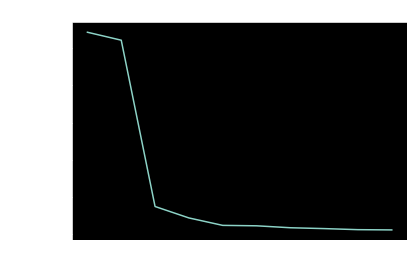

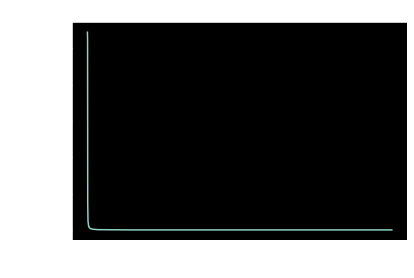

In [10]:
print("\n Eigenvalues corresponding to the first 10 principal components are:")
print(states['eigen_vals'][:10])

plt.title('Plot of first 10 Eigenvalues')

plt.xlabel('index of corresponding principal component')
plt.ylabel('Eigenvalues')


plt.plot(range(1,11),states['eigen_vals'][:10])
plt.figure()


plt.title('Plot of All Eigenvalues')
plt.xlabel('index of corresponding principal component')
plt.ylabel('Eigenvalues')


plt.plot(np.arange(1,states['eigen_vals'].shape[0]+1),states['eigen_vals'])


In [11]:
total_eigvals = states['eigen_vals'].shape[0] 
vL = np.sum(states['eigen_vals'],axis=0)   
for i in range(1, total_eigvals):
    vk = np.sum(states['eigen_vals'][:i], axis=0)
    if (vk/vL>=.95):
        break
        
        
print("For 95%:")
print("K = ", i)
print("v(K) = ", vk)
print("v(K)/v(L) = ", vk/vL)
print("% Reduction in Dimension = ", ((total_eigvals - i)*100)/total_eigvals)


print("\nFor 99%:")
for i in range(43, total_eigvals):
    vk=np.sum(states['eigen_vals'][:i], axis = 0)
    if (vk/vL >= .99):
        break

print("K=", i)
print("v(K)=", vk)
print("v(K)/v(L)=", vk/vL)
print("% Reduction in Dimension = ", ((total_eigvals - i)*100)/total_eigvals)

For 95%:
K =  43
v(K) =  6948821.334008656
v(K)/v(L) =  0.9503223649037646
% Reduction in Dimension =  97.8670634920635

For 99%:
K= 167
v(K)= 7239287.943373614
v(K)/v(L)= 0.9900466435791013
% Reduction in Dimension =  91.71626984126983
